In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import string
%matplotlib inline

In [2]:
df = pd.read_csv('./data/captions.csv')

In [3]:
df.head()

,Sr No,Image File,Caption
0,1,img/insta1,NaN
1,2,img/insta2,bye
2,3,img/insta3,"Ok, a few more... sorry I just had so much fun..."
3,4,img/insta4,This was one of my favorite shoots I’ve ever d...
4,5,img/insta5,Wrapped round my finger like a ring


In [4]:
df = df.drop('Sr No', axis=1)
df = df.drop('Image File', axis=1)

In [5]:
df.head()

,Caption
0,NaN
1,bye
2,"Ok, a few more... sorry I just had so much fun..."
3,This was one of my favorite shoots I’ve ever d...
4,Wrapped round my finger like a ring


&lt;AxesSubplot:&gt;

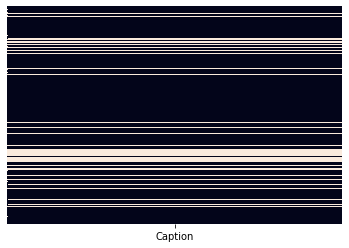

In [6]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False)

In [7]:
len(df)

20515

In [8]:
len(df.dropna())

17100

In [9]:
df = df.dropna()

In [10]:
df.head()

,Caption
1,bye
2,"Ok, a few more... sorry I just had so much fun..."
3,This was one of my favorite shoots I’ve ever d...
4,Wrapped round my finger like a ring
5,Yesterday was so much fun!! has been such a hu...


In [11]:
df['Caption'][2]

&#39;Ok, a few more... sorry I just had so much fun that day &#39;

In [12]:
def text_process(caption):
    """
    1. remove punchuation
    2. remove useless emojis
    3. keep only lowercase alphabets
    """
    
    nopunc = [char for char in caption.lower() if char not in string.punctuation]
    nopunc = [char for char in caption.lower() if char in (string.ascii_lowercase + ' ')]
    nopunc = ''.join(nopunc)
    
    return nopunc

In [13]:
df = df['Caption'].apply(text_process)

In [14]:
data = np.array(df)

In [15]:
data[3]

&#39;wrapped round my finger like a ring &#39;

In [16]:
# slicing the data to just 3000 instead of 17000 to save training time
data = data[:3001]

In [17]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

In [18]:
tokenizer = Tokenizer()

tokenizer.fit_on_texts(data)
total_words = len(tokenizer.word_index) + 1

# print(tokenizer.word_index)
# print(total_words)

In [19]:
from tensorflow.keras.utils import to_categorical

In [20]:
input_sequences = []

for line in data:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)

max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

xs, labels = input_sequences[:,:-1],input_sequences[:,-1]

ys = to_categorical(labels, num_classes=total_words)

In [21]:
xs[8]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.optimizers import Adam

In [23]:
model = Sequential()

model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))

model.add(Bidirectional(LSTM(150)))

model.add(Dense(total_words, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.01), metrics=['accuracy'])

In [24]:
model.summary()

Model: &quot;sequential&quot;
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 357, 100)          473900    
_________________________________________________________________
bidirectional (Bidirectional (None, 300)               301200    
_________________________________________________________________
dense (Dense)                (None, 4739)              1426439   
Total params: 2,201,539
Trainable params: 2,201,539
Non-trainable params: 0
_________________________________________________________________


In [25]:
from tensorflow.keras.callbacks import EarlyStopping

In [26]:
early_stop = EarlyStopping(monitor='val_loss', patience=1)

In [27]:
from tensorflow.config import list_physical_devices

In [28]:
list_physical_devices('GPU')

[PhysicalDevice(name=&#39;/physical_device:GPU:0&#39;, device_type=&#39;GPU&#39;)]

In [29]:
num_epochs = 13

# history = model.fit(xs, ys, epochs=num_epochs, verbose=1, callbacks=[early_stop])
history = model.fit(xs, ys, epochs=num_epochs, verbose=1)

Epoch 1/13
1005/1005 [==============================] - 67s 67ms/step - loss: 6.4742 - accuracy: 0.0756
Epoch 2/13
1005/1005 [==============================] - 67s 67ms/step - loss: 5.5096 - accuracy: 0.1362
Epoch 3/13
1005/1005 [==============================] - 67s 67ms/step - loss: 4.7814 - accuracy: 0.1709
Epoch 4/13
1005/1005 [==============================] - 67s 67ms/step - loss: 4.1278 - accuracy: 0.2148
Epoch 5/13
1005/1005 [==============================] - 67s 67ms/step - loss: 3.6323 - accuracy: 0.2624
Epoch 6/13
1005/1005 [==============================] - 67s 67ms/step - loss: 3.2122 - accuracy: 0.3095
Epoch 7/13
1005/1005 [==============================] - 67s 67ms/step - loss: 2.9387 - accuracy: 0.3505
Epoch 8/13
1005/1005 [==============================] - 67s 67ms/step - loss: 2.7405 - accuracy: 0.3767
Epoch 9/13
1005/1005 [==============================] - 67s 67ms/step - loss: 2.5773 - accuracy: 0.4011
Epoch 10/13
1005/1005 [==============================] - 67s 67m

In [30]:
def plot_graphs(history, string):
    plt.figure(figsize=(12, 8))
    plt.plot(history.history[string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.show()

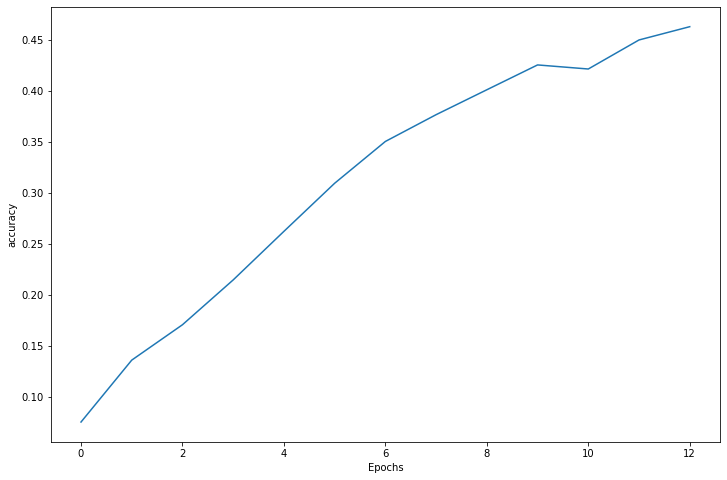

In [31]:
plot_graphs(history, 'accuracy')

In [40]:
def generate_text(seed_text, next_words):
    for _ in range(next_words):
        token_list = tokenizer.texts_to_sequences([seed_text])[0]
        token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
        # predicted = model.predict_classes(token_list, verbose=0)
        predicted = np.argmax(model.predict(token_list, verbose=0), axis=-1)
        output_word = ""

        for word, index in tokenizer.word_index.items():
            if index == predicted:
                output_word = word
                break
        seed_text += " " + output_word

    return seed_text

In [41]:
seed_text = "I'm so handsome"
next_words = 70

print(generate_text(seed_text=seed_text, next_words=next_words))

I&#39;m so handsome excited to be the year of my life i love you and thank you for all the love and support last year was recovering was the absolute love of my life i love you guys to the moon and back to me be an adult life is heard join the movement and link in bio yeet the song help me help me the chance i love you guys you guys


In [42]:
print(generate_text(seed_text="Look at me", next_words=40))

Look at me minding my new music video shoot for the madness loganpaul having the best lubricant for oiling the machinery at is also wearing our eyeshadow palette and if youre vegan and antigun swipe right enter tag friends food please call it


In [44]:
import pickle

In [45]:
model.save('insta_caption_model.h5')
with open('tokenizer_insta.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=4)

In [46]:
word_index = tokenizer.word_index

reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)

(4739, 100)


In [48]:
import io

vocab_size = 4739

out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
for word_num in range(1, vocab_size):
  word = reverse_word_index[word_num]
  embeddings = weights[word_num]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()